In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as pe
import seaborn as sb
import io

<p style="color:#8498f0 ; font-size:large">
MATADATA:-

<p style="color:#8498f0 ; font-size:small">
Age : Age of the patient
<p style="color:#8498f0 ; font-size:small">
Sex : Sex of the patient
<p style="color:#8498f0 ; font-size:small">
exng: exercise induced angina (1 = yes; 0 = no)
<p style="color:#8498f0 ; font-size:small">
caa: number of major vessels (0-3)
<p style="color:#8498f0 ; font-size:small">
cp : Chest Pain type chest pain type
<p style="color:#8498f0 ; font-size:small">
Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)
<p style="color:#8498f0 ; font-size:small">
chol : cholestoral in mg/dl fetched via BMI sensor
<p style="color:#8498f0 ; font-size:small">
fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
<p style="color:#8498f0 ; font-size:small">
rest_ecg : resting electrocardiographic results
<p style="color:#8498f0 ; font-size:small">
Value 0: normal<br>
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria<br>
thalach : maximum heart rate achieved<br>
<p style="color:#8498f0 ; font-size:small">
target : 0= less chance of heart attack 1= more chance of heart attack


In [3]:
df = pd.read_csv("heart.csv")

In [4]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<p style="color:#8498f0 ; font-size:large">
METADATA ABOUT GENDER AND CHEST PAIN

<p style="color:#8498f0 ; font-size:small">
cp : Chest Pain type chest pain type<br>
Value 0: typical angina<br>
Value 1: atypical angina<br> 
Value 2: non-anginal pain  <br>
Value 3: asymptomatic <br>

<p style="color:#8498f0 ; font-size:small">
sex: gender<br>
0:male<br>
1:female<br>

In [5]:
cross = pd.crosstab(df["sex"] , df["cp"])
cross.transpose()

sex,0,1
cp,,
0,39,104
1,18,32
2,35,52
3,4,19


In [6]:
pe.bar(cross ,template="plotly_dark" ,width=1000, height=600)

In [38]:
gr = df.groupby("sex", as_index=False)["thalachh"].mean()
gr
pe.bar(gr , x="sex" ,y="thalachh" , width=1000 , height=500 , template="plotly_dark" , title="Mean values of heart rate ")

<p style="color:#13e010 ; font-size:large">
Here We Cant Find Any Correlation Over 75% So We Will Not Eliminate Any Feature

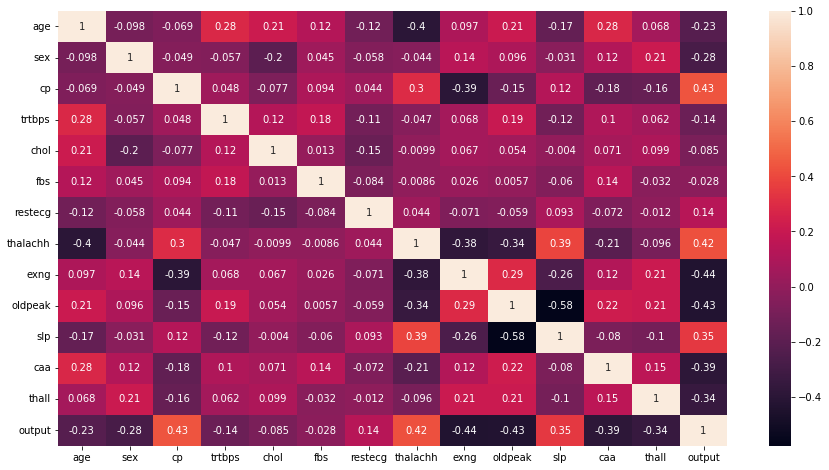

In [7]:
plt.figure(figsize=(15,8))
dataplot = sb.heatmap(df.corr(method ='pearson'), annot=True)

In [8]:
grp = df.groupby("age", as_index=False)["chol"].mean()
grp.style.background_gradient(cmap = "Reds",axis=None)

,age,chol
0,29,204.000000
1,34,196.000000
2,35,213.750000
3,37,232.500000
4,38,193.666667
5,39,239.750000
6,40,196.333333
7,41,220.700000
8,42,246.750000
9,43,256.750000


In [40]:
from sklearn.linear_model import LogisticRegression 
from sklearn import svm 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 

In [41]:
x=df.drop(['output'],axis=1)
y=df['output']

In [66]:
train_X, test_X, train_Y, test_Y = train_test_split(x, y, test_size=0.2 , random_state=120)

In [67]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(train_X, train_Y)

/home/sugata/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(random_state=0)

In [68]:
y_pred = classifier.predict(test_X)

In [69]:
from sklearn.metrics import accuracy_score

print ("Accuracy : ", accuracy_score(test_Y, y_pred))


Accuracy :  0.9180327868852459


In [70]:
import pickle

In [72]:
pickle.dump(classifier , open("heartattack.pkl","wb"))